# Goal

This post aims to introduce how to conduct feature selection by **variance thresholding**

**Reference**
* [scikit-learn - Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)


# Libraries

In [26]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Boston housing data

In [4]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Add low variance columns

In [14]:
np.var(np.random.random(size=df_boston.shape[0]))

0.08309365785384086

In [16]:
df_boston['low_variance'] = 1
df_boston['low_variance2'] = (np.random.random(size=df_boston.shape[0]) > 0.5) * 1
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,low_variance,low_variance2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,1


# Variance Thresholding

In [50]:
variance_threshold = 0.1
selection = VarianceThreshold(threshold=variance_threshold)
selection.fit(df_boston)

VarianceThreshold(threshold=0.1)

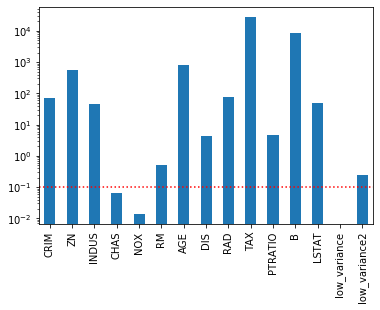

In [51]:
ax = pd.Series(selection.variances_, index=df_boston.columns).plot(kind='bar', logy=True);
ax.axhline(variance_threshold, ls='dotted', c='r');

In [52]:
df_boston_selected = pd.DataFrame(selection.transform(df_boston), columns=df_boston.columns[selection.get_support()])
df_boston_selected.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,low_variance2
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.0
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.0
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.0
